In [5]:
%reload_ext autoreload
%autoreload 2

from analyze import get_params_to_analyze, run_mult_sim_analysis

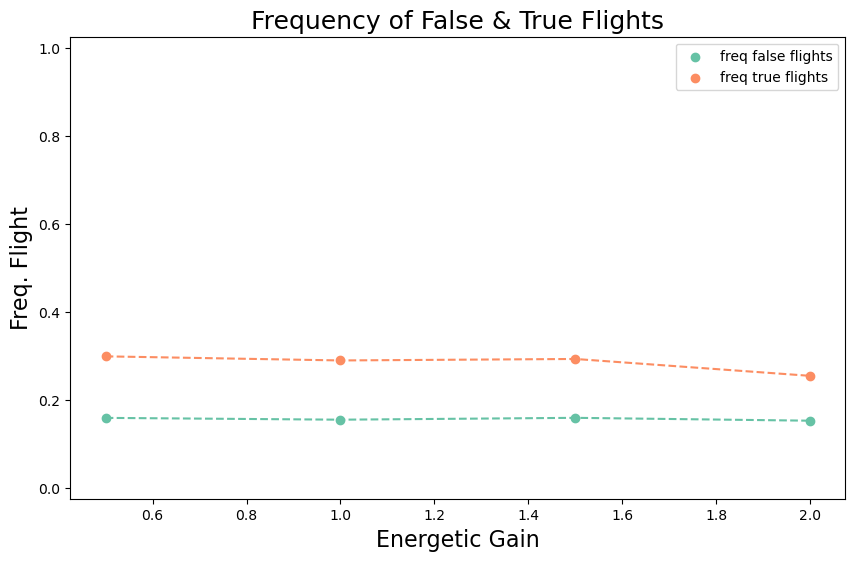

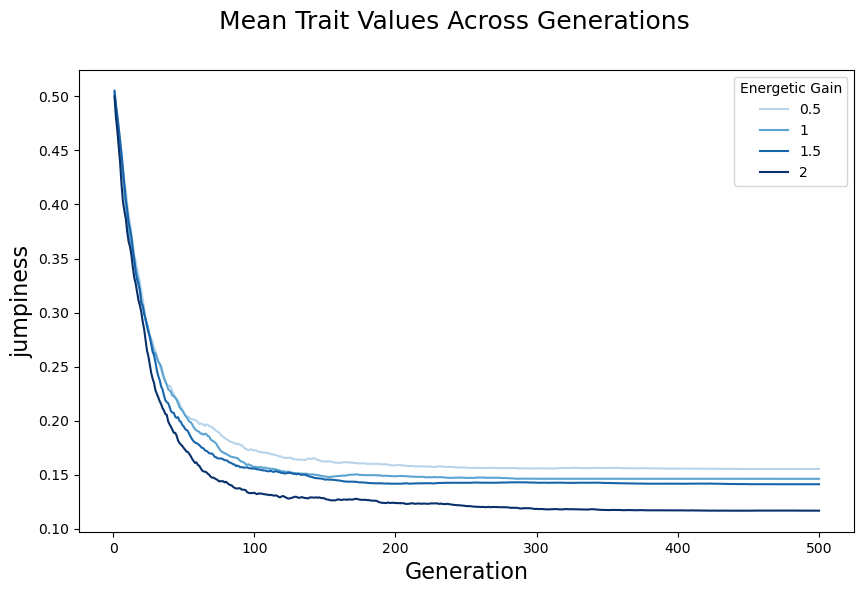

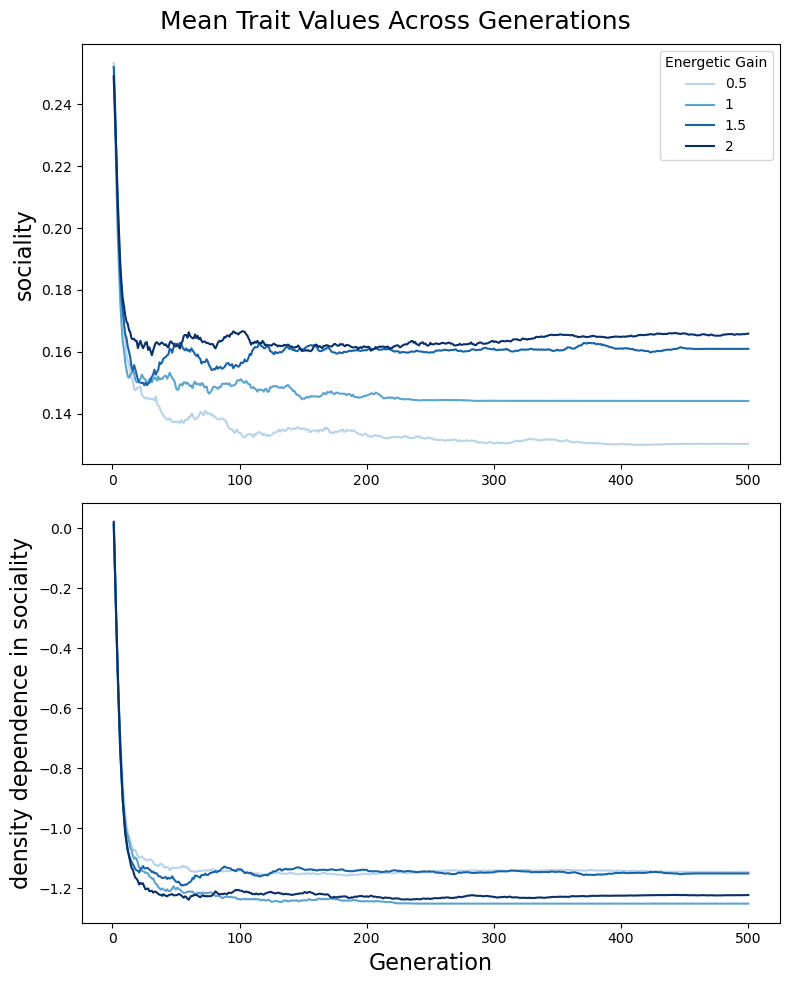

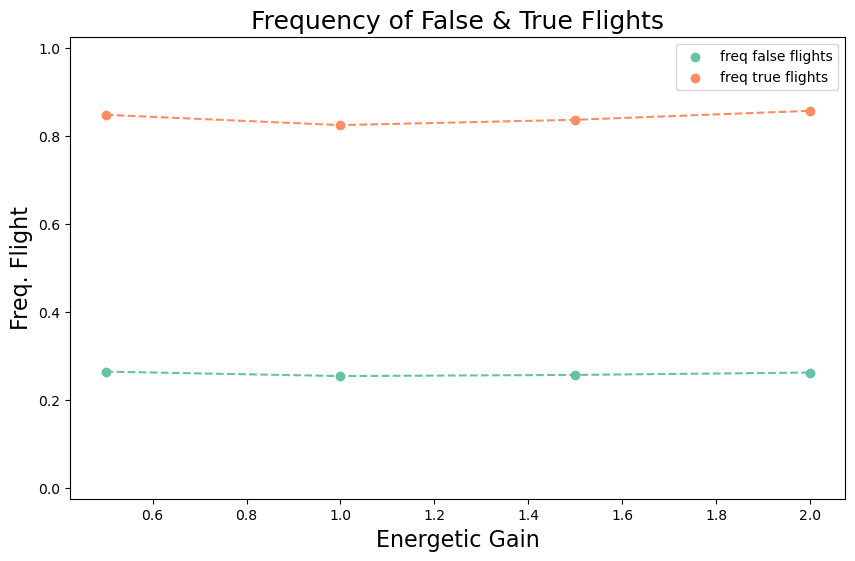

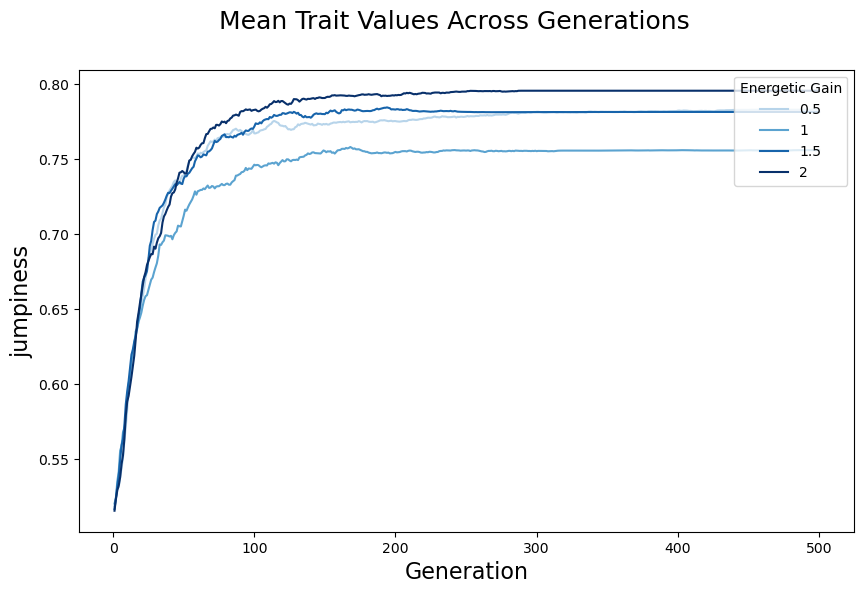

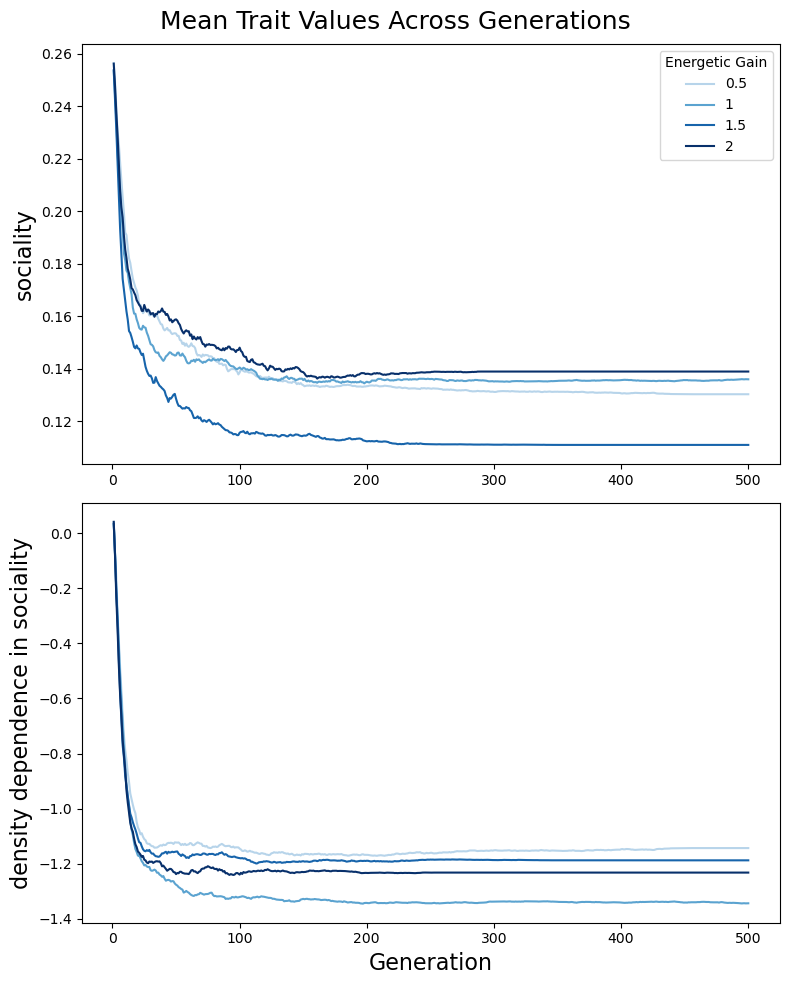

In [6]:
params, param = get_params_to_analyze("e_gain")
run_mult_sim_analysis(params, param)